<a href="https://colab.research.google.com/github/jlvoltan/bootcamp_python/blob/master/m2_cap3_boot_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Módulo 2 - Cap 3 - Bootcamp PYTHON**
*Atualizado em 27 JUL 2020* 

*jlvoltan*

# **Pandas**
"*pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,built on top of the Python programming language*" https://pandas.pydata.org/

Muito usada para análise de dados, para trabalhar com tabelas Excel, SQL, séries temporais, matrizes...

É baseada ao Numpy

* Instalação

pip install pandas

conda install pandas


Tipos de dados:
![texto alternativo](https://pbpython.com/images/pandas_dtypes.png)

In [83]:
import pandas as pd

* Series (1 coluna) x data frame (2 ou mais)

## Leitura de dados
* Leitura de arquivos: 
  1. read_csv
  2. read_json
  3. read_excel
* separador das linhas, separador decimal (o default é o .)



In [84]:
arquivo_csv = pd.read_csv("http://pycourse.s3.amazonaws.com/temperature.csv")
arquivo_csv

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio


In [85]:
arquivo_excel = pd.ExcelFile("http://pycourse.s3.amazonaws.com/temperature.xlsx")
arquivo_excel

In [86]:
arquivo_excel2 = pd.read_excel(arquivo_excel, sheet_name='Sheet1')
arquivo_excel2

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio


In [87]:
arquivo_excel3 = pd.read_excel(arquivo_excel, sheet_name='Sheet2')
arquivo_excel3

,date,temperatura,classification
0,2020-01-01,"29,1",quente
1,2020-02-01,"31,2",muito quente
2,2020-03-01,"28,5",quente
3,2020-04-01,"28,0",quente
4,2020-05-01,"24,0",confortavel
5,2020-06-01,"20,0",frio


In [88]:
#Para corrigir a vírgula...
arquivo_excel3 = pd.read_excel(arquivo_excel, sheet_name='Sheet2', decimal=',')
arquivo_excel3

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio


## Primeiras manipulações

In [89]:
#Exibe as n primeiras linhas do arquivo
n= 5
arquivo_excel2.head(n)

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel


In [90]:
#Exibe as n últimas linhas do arquivo
n= 5
arquivo_excel2.tail(n)

,date,temperatura,classification
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio


In [91]:
#tipos de dados
#Exibe as n primeiras linhas do arquivo

arquivo_excel2.dtypes

date              datetime64[ns]
temperatura              float64
classification            object
dtype: object

In [92]:
#estatisticas básicas
#Exibe as n primeiras linhas do arquivo

arquivo_excel2.describe()

,temperatura
count,6.000000
mean,26.800000
std,4.075782
min,20.000000
25%,25.000000
50%,28.250000
75%,28.950000
max,31.200000


In [93]:
arquivo_excel2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            6 non-null      datetime64[ns]
 1   temperatura     6 non-null      float64       
 2   classification  6 non-null      object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 272.0+ bytes


## Renomear nomes de colunas


In [94]:
arquivo_excel2.columns=["colunaA","ColunaB","Coluna C"]
arquivo_excel2

,colunaA,ColunaB,Coluna C
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio


## Indexação

### Indexação direta:

* nome_data_frame['nome_coluna']   
  * *O retorno é um Panda series.*
* nome_data_frame[['nome_coluna1','nome_coluna2']] 
  * *O retorno é um Pandas dataframe*

In [95]:
a = arquivo_csv['temperatura']
print(a)
print("Tipo do objeto: " + str(type(a)))

0    29.1
1    31.2
2    28.5
3    28.0
4    24.0
5    20.0
Name: temperatura, dtype: float64
Tipo do objeto: <class 'pandas.core.series.Series'>


In [96]:
a = arquivo_csv[['temperatura','classification','date']]
print(a)

   temperatura classification        date
0         29.1         quente  2020-01-01
1         31.2   muito quente  2020-02-01
2         28.5         quente  2020-03-01
3         28.0         quente  2020-04-01
4         24.0    confortavel  2020-05-01
5         20.0           frio  2020-06-01


### Usando métodos

* Método iloc()
  * Usa o índice da coluna e linha (int)
  * nome_data_frame.iloc[indice_linha, indice_coluna]   
  * nome_data_frame.iloc[i:j, k:l] 
    * Lembrar que ao usar **:** é um exclusive no último elemento

* Método loc()
  * Usa strings ou listas
  * nome_data_frame.iloc[nome_linha, nome_coluna]   

In [97]:
# ILOC()
arquivo_csv.iloc[:,1]

0    29.1
1    31.2
2    28.5
3    28.0
4    24.0
5    20.0
Name: temperatura, dtype: float64

In [98]:
# ILOC()
print(arquivo_csv.iloc[0:2,2]) #Perceba no : que a coluna 2 não entra

0          quente
1    muito quente
Name: classification, dtype: object


In [99]:
# LOC()
arquivo_csv.loc[1:5,'date']

1    2020-02-01
2    2020-03-01
3    2020-04-01
4    2020-05-01
5    2020-06-01
Name: date, dtype: object

In [100]:
# LOC()
arquivo_csv.loc[1:5,['date','temperatura']]

,date,temperatura
1,2020-02-01,31.2
2,2020-03-01,28.5
3,2020-04-01,28.0
4,2020-05-01,24.0
5,2020-06-01,20.0


In [101]:
# LOC()
arquivo_csv.loc[1:5,'temperatura' :] #Nesse caso, pega as colunas posteriores a coluna temperatura

,temperatura,classification
1,31.2,muito quente
2,28.5,quente
3,28.0,quente
4,24.0,confortavel
5,20.0,frio


### Indexação Booleana

* É uma operação de filtragem
* Posso pegar somente as linhas ou colunas que atendem uma condição;

* Podemos alterar o tipo de uma coluna, para conseguir fazer operações booleanas

In [102]:
arquivo_csv.dtypes

date               object
temperatura       float64
classification     object
dtype: object

In [103]:
arquivo_csv['date'] = pd.to_datetime(arquivo_csv['date'])

In [104]:
arquivo_csv.dtypes #Perceba que agora o tipo da coluna date mudou

date              datetime64[ns]
temperatura              float64
classification            object
dtype: object

In [105]:
#Perceba que está retornando a classificação lógica
arquivo_csv['classification'] !='quente'

0    False
1     True
2    False
3    False
4     True
5     True
Name: classification, dtype: bool

In [106]:
# Aquela classificação lógica é usada como indice do dataframe
arquivo_csv[arquivo_csv['classification'] !='quente']

,date,temperatura,classification
1,2020-02-01,31.2,muito quente
4,2020-05-01,24.0,confortavel
5,2020-06-01,20.0,frio


In [107]:
# Como parâmetro do método loc, passamos nome das linhas e nome das colunas
arquivo_csv.loc[arquivo_csv['classification'] !='quente', 'temperatura']

1    31.2
4    24.0
5    20.0
Name: temperatura, dtype: float64

### Setar o índice das linhas ao invés do automático

In [108]:
arquivo_csv=arquivo_csv.set_index('date')
#Esses valores de date passaram a ser o índice da linha
arquivo_csv.head()

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-05-01,24.0,confortavel


In [109]:
arquivo_csv[arquivo_csv.index <= '2020-03-01']

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente


## **Ordenação**
* Pelas colunas
* Pelo Index

* nome_dataframe.sort_values(by='nome_coluna')
  * Posso usa em ordem decrescente: *ascending = False*
  * Posso usar critério de desempate passando mais de uma coluna ['col1','col2']
  * Posso falar o que fazer com NA (not a Number). O default é vir por último.

In [110]:
# Ordenação simples (Crescente)
arquivo_csv.sort_values(by='classification')

,temperatura,classification
date,,
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio
2020-02-01,31.2,muito quente
2020-01-01,29.1,quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente


In [111]:
# Usando o critério de desempate como coluna temperatura
arquivo_csv.sort_values(by=['classification','temperatura'])

,temperatura,classification
date,,
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio
2020-02-01,31.2,muito quente
2020-04-01,28.0,quente
2020-03-01,28.5,quente
2020-01-01,29.1,quente


In [112]:
# Ordenação decrescente
arquivo_csv.sort_values(by='classification', ascending= False)

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-02-01,31.2,muito quente
2020-06-01,20.0,frio
2020-05-01,24.0,confortavel


In [113]:
#ordenação pelo index (pode ser a numeração de cada linha, 
#ou pode ser a coluna date que designei)
# Ordenação simples
arquivo_csv.sort_index(ascending=False)

,temperatura,classification
date,,
2020-06-01,20.0,frio
2020-05-01,24.0,confortavel
2020-04-01,28.0,quente
2020-03-01,28.5,quente
2020-02-01,31.2,muito quente
2020-01-01,29.1,quente


## **Visualização gráfica**


* Método plot() 
  * figsize=(valor1_horizontal,valor2_vertical)  
    * *Mudar tamanho*
  * grid=True     
    * *colocar o Grid*
  * style='--' ou '-o' ou '-.'
    * *marcar os pontos*
  * linewidth=3
    * *Grossura da linha*
  * color = 'red'  
    * *Cor, podemos usar hexadecimal para o código da cor*

In [114]:
#arquivo_csv['date'] = pd.to_datetime(arquivo_csv['date'])

In [115]:
#arquivo_csv=arquivo_csv.set_index('date')
#Esses valores de date passaram a ser o índice da linha

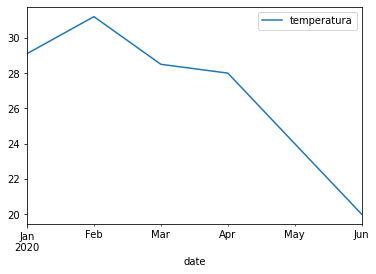

In [116]:
# Plotando o gráfico. Perceba q o eixo X foi o index (e que era a numeração das linhas antes e mudamos pra data)
#e o y foi a temperatura.
arquivo_csv.plot(); #esse ponto e virgula evita uma mensagem


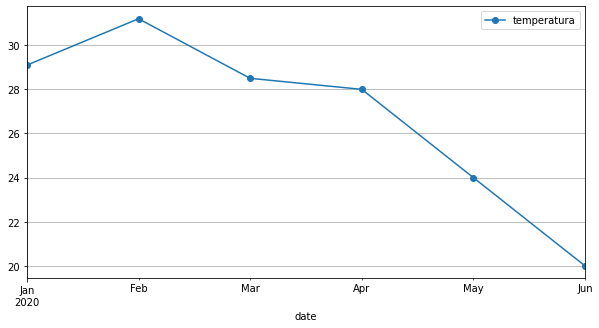

In [117]:
arquivo_csv.plot(figsize=(10,5), grid=True, style='-o'); #esse ponto e virgula evita uma mensagem

### **Gráfico para variáveis categóricos**
* value_counts()
 * Conta a quantidade de cada variável categórica
* plot.bar(figsize=(10,5), rot=0)
  * Plotar gráfico de barra, rot é a rotação dos nomes nas barras
* plot.pie(autopct='%1.1f%%', shadow = True, figsize = (10,7))
  * Gráfico de pizza, shadow é o sombreamento, autopct mostra as %

In [118]:
arquivo_csv['classification'].value_counts()

quente          3
confortavel     1
muito quente    1
frio            1
Name: classification, dtype: int64

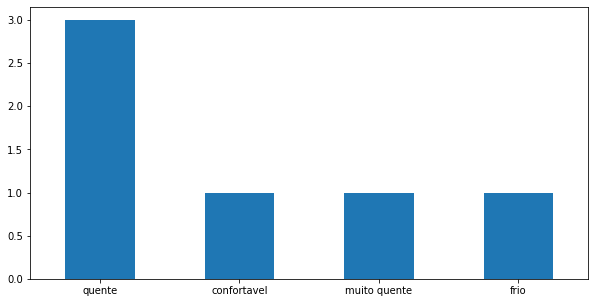

In [119]:
arquivo_csv['classification'].value_counts().plot.bar(figsize=(10,5), rot=0)

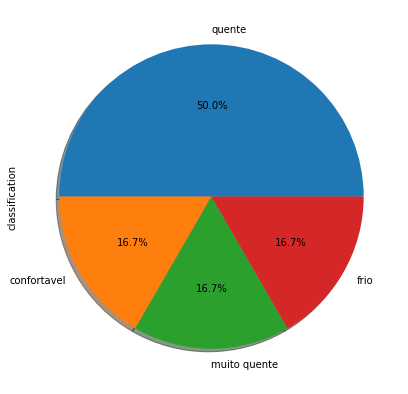

In [120]:
arquivo_csv['classification'].value_counts().plot.pie(autopct='%1.1f%%', shadow = True, figsize = (10,7));

## Group By
* A ideia é agrupar classes, e aplicar funções (sum, mean, median...)

In [121]:
arquivo_csv.groupby(by='classification').median()

,temperatura
classification,
confortavel,24.0
frio,20.0
muito quente,31.2
quente,28.5


## Operação drop , copy

### Operação drop 
* retorna um dataframe sem determinados dados
* Se eu quiser alterar direto no meu objeto, preciso passar **inplace=True** 

In [122]:
arquivo_csv.drop('classification', axis=1) 
# Só está apagando no retorno

,temperatura
date,
2020-01-01,29.1
2020-02-01,31.2
2020-03-01,28.5
2020-04-01,28.0
2020-05-01,24.0
2020-06-01,20.0


### **Operação copy**
* Copia um dataframe
* O problema de se fazer **a = b** direto, é que ambos estariam compartilhando memória, dai qualquer modificação em um, surtiria efeito no outro

In [123]:
arquivo_csv2 = arquivo_csv.copy()